## Data preprocessing

In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/home/mir/Dataset/cats_dogs_small/train/'
validation_dir = '/home/mir/Dataset/cats_dogs_small/validation/'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # Resize all images to 150x150
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## A small convnet for dogs vs. cats classification

In [2]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Configuring the model for training

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Fitting the model using a batch generator

In [4]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30


/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293863424 bytes but only got

 98/100 [============================>.] - ETA: 0s - loss: 0.6952 - acc: 0.5194

/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3846701056 bytes but only 

100/100 [==============================] - 8s 75ms/step - loss: 0.6942 - acc: 0.5225 - val_loss: 0.7297 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 4s 38ms/step - loss: 0.6652 - acc: 0.6110 - val_loss: 0.6670 - val_acc: 0.5430
Epoch 3/30
100/100 [==============================] - 4s 38ms/step - loss: 0.6158 - acc: 0.6585 - val_loss: 0.6116 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 4s 38ms/step - loss: 0.5716 - acc: 0.7020 - val_loss: 0.6055 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 4s 36ms/step - loss: 0.5429 - acc: 0.7130 - val_loss: 0.5781 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 4s 38ms/step - loss: 0.5207 - acc: 0.7505 - val_loss: 0.5709 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 4s 37ms/step - loss: 0.4804 - acc: 0.7705 - val_loss: 0.6229 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 4s 38ms/step - loss: 0.460

Save the model.

In [6]:
model.save('cats_and_dogs.h5')

## Displaying curves of loss and accuracy during training

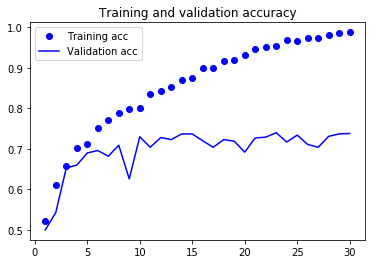

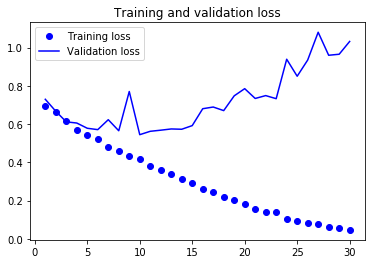

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc  = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()